# Regression

## Linear Regression

<img src="media/linear.jpg" width="600">

## Definifion

We consider a regression problem with entries $X=(X_{1},X_{2},...,X_{p})$ and responde $Y$. One of the simplest ways to predict $Y$ as a function of the $X_{j}$'s is through a weighted sum of the values of $X_{j}$'s using a function with the form: $$f_{\beta}(X)=\beta_{1}X_{1}+\beta_{2}X_{2}+...+\beta_{p}X_{p}$$

We want to find apropriate values for the $\beta$'s given a train sample $\ell$ $$\hat{f_{\beta}}(X)=\beta_{1} X_{1}+\beta_{2}X_{2}+...+\beta_{p}X_{p}$$

And we'll use that function $\hat{f}$ to meke predictions

## Example 

Let's use our Google Store Data
Remember to [download the Dataset](https://www.dropbox.com/sh/fhk309b9f1c5568/AACQOyCYzQT3DxFZCieDW_ida?dl=0) **'apps_clean.csv'** which is the information we already cleaned and analyzed.

## Coefficient Learning (adjusting)

We would like to build an algorithm that learns the coefficients of the model from a training sample: 
$$ \ell = \{(x^{(1)},y^{(1)}),(x^{(2)},y^{(2)}),...,(x^{(n)},y^{(n)})\}$$

The most used learning algorithm for linear regression is **Least Squares**:

We build the predictions for our training sample:

$$\hat{y}^{(i)}=f_{\beta}(x^{(i)})=\beta_{0}+\beta_{1}x_{1}^{(i)}+...+\beta_{p}x_{p}^{(i)}$$

And we consider the difference between the predicted values and the observed ones:

$$\epsilon^{(i)}=y^{(i)}-f_{\beta}(x^{(i)})$$

Then, the idea is to minimize the sum of the square of the residuals, trying to make the adjusted function pass as close to the training points as possible. We want to solve for:

$$min_{\beta} RSS(\beta) = min_{\beta}\Sigma_{i=1}^{N}(y^{(i)}-f_{\beta}(x^{(i)}))^{2}$$

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import math
import numpy as np
import seaborn as sns

/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
os.getcwd()

'/home/franciscoar/git/python_4_fin/machine_learning_intro/supervised_learning'

In [3]:
os.chdir('/home/franciscoar/Documents')

# In our problem

Text(0, 0.5, 'Number of Reviews')

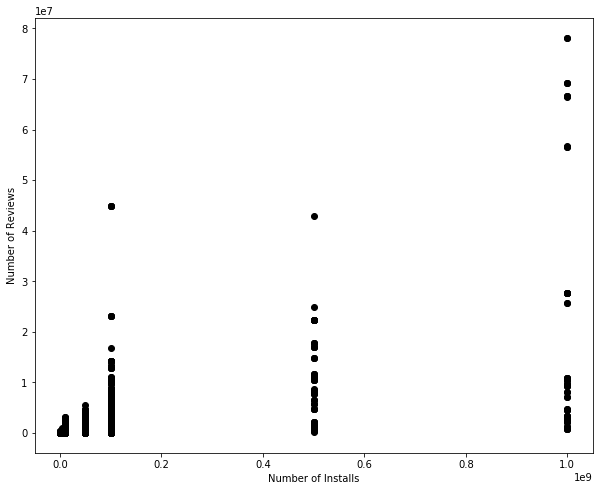

In [4]:
apps = pd.read_csv('apps_clean.csv')
x_df = pd.DataFrame(apps.Installs)
y_df = pd.DataFrame(apps.Reviews)

plt.figure(figsize=(10,8))
plt.plot(x_df, y_df,'ko')  #kx,kv,k.,ko porque son dataframes y no np arrays
plt.xlabel('Number of Installs')
plt.ylabel('Number of Reviews')

Not proportionate because the scale of the information is very big, we have to transform the variables to get a better perspective.

Text(0, 0.5, 'Log10 Reviews')

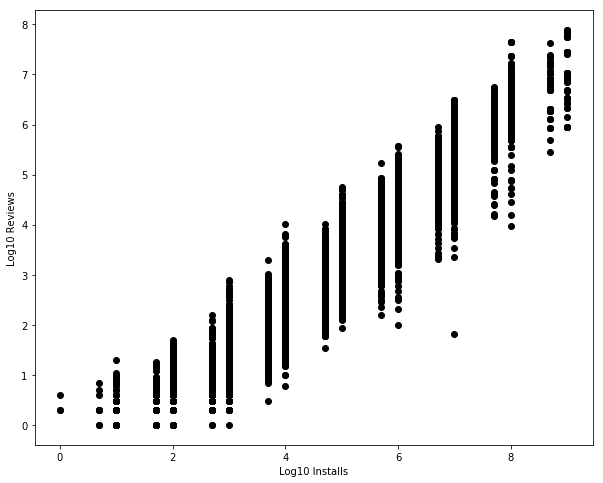

In [5]:
apps['log10_installs'] = apps['Installs'].apply(lambda x: math.log10(x))
apps['log10_reviews'] = apps['Reviews'].apply(lambda x: math.log10(x))

x_df = pd.DataFrame(apps.log10_installs)
y_df = pd.DataFrame(apps.log10_reviews)

plt.figure(figsize=(10,8))
plt.plot(x_df, y_df,'ko')  #kx,kv,k.,ko porque son dataframes y no np arrays
plt.xlabel('Log10 Installs')
plt.ylabel('Log10 Reviews')

But how do we find the best model from all the possible models that we could build using this information?

Text(0, 0.5, 'Log10 Reviews')

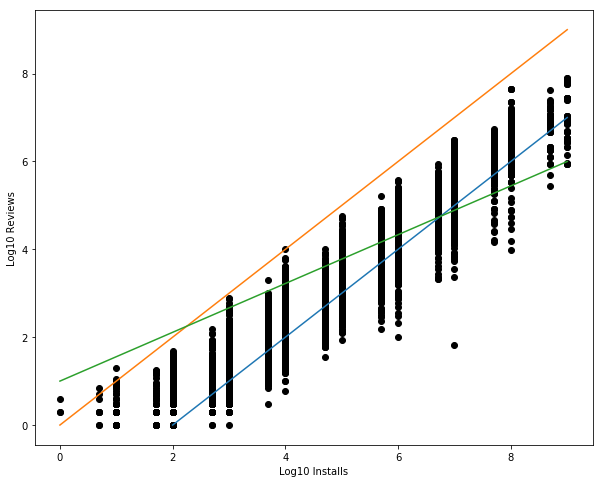

In [6]:
plt.figure(figsize=(10,8))
plt.plot(x_df, y_df, 'ko')
plt.plot([2, 9], [0,7], '-')
plt.plot([0, 9], [0,9], '-')
plt.plot([0, 9], [1,6], '-')
plt.xlabel('Log10 Installs')
plt.ylabel('Log10 Reviews')

## Gradient Descent

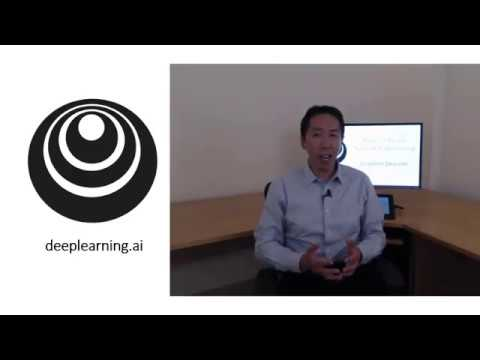

In [7]:
from IPython.lib.display import YouTubeVideo
YouTubeVideo('uJryes5Vk1o')

Cost function to minimize:
    $$min_{\beta} RSS(\beta) = min_{\beta}\Sigma_{i=1}^{N}(y^{(i)}-f_{\beta}(x^{(i)}))^{2}$$

Our linear regression hypothesis:
$$h_\theta(x) = \beta^{T}x = \beta_0 + \beta_1x_1$$

We look for $\beta_j$ to minimize $J(\beta)$.  Every iteration computes an actualized average parameter from the following expression:
$$\beta_j := \beta_j - \beta\frac{1}{m}\sum_{i=1}^m (h_\beta(x^{(i)})-y^{(i)})x_{j}^{(i)}$$

In [8]:
x_df['intercept'] = 1

In [9]:
x = np.array(x_df)# we want this dim=2
y = np.array(y_df).flatten()  #dim1, flatten concatena arrays de arrays en uno solo continuo, chk zip
theta = np.array([0, 0]) #vector inicializado con ceros

### Our Cost Function

In [10]:
def cost_function(X, y, theta):
    """
    Funcion de costo
    """
    ## Number of points in the dataset
    m = len(y) 
    
    J = np.sum((X.dot(theta)-y)**2)/2/m # Mean Squared Error
    
    return J

What is it really doing there??

In [11]:
x.dot(theta) # Because it began in zeros (As we defined it before)

array([0., 0., 0., ..., 0., 0., 0.])

In [12]:
x.dot(theta)-y # This is our error

array([-2.20139712, -2.98542647, -4.94205768, ..., -0.60205999,
       -2.05690485, -5.60021794])

In [13]:
np.sum((x.dot(theta)-y)**2)/2/len(y)

8.013514267637422

If we apply our function we get the same, remember this is when beta = 0 so we are not predicting, we are just comparing zero against the real value, our idea is to iterate through this beta and get to a point where we minimize our "loss function" which is a different way to call the error.

In [14]:
cost_function(x, y, theta)

8.013514267637422

Now we define our gradient descent function

In [15]:
def gradient_descent(X, y, theta, alpha, iterations):
    
    cost_history = [0] * iterations
    
    for iteration in range(iterations):
        hypothesis = X.dot(theta)
        loss = hypothesis-y # al principio este loss es enorme porque hypothesis es un vec de ceros
        # and the first is a zeros vector because is dot of X and zeros. Este es el error que aparece en las ecuaciones de Felipe
        m = len(y) 
        gradient = X.T.dot(loss)/m  #the size of the gradient is maximized by the size of loss
        # this means that the bigger the loss (error), the more it'll move
        theta = theta - alpha*gradient
        cost = cost_function(X, y, theta) # mse
        cost_history[iteration] = cost # mse
        #print(loss)
        #print(gradient)
        
    return theta, cost_history

In [17]:
iterations = 1500 #asume converges in this number of iterations
alpha = 0.01
    
(t, c) = gradient_descent(x,y,theta,alpha, iterations)

list(c)

[3.809317268899158,
 1.8784749807798329,
 0.9916440343249847,
 0.5842630915144523,
 0.3970640644707086,
 0.3109811635821361,
 0.271334839122721,
 0.2530141571304245,
 0.24448721916029165,
 0.24045813751117054,
 0.2384948383332089,
 0.23748042026643662,
 0.23690195929328609,
 0.2365239008160604,
 0.23623806884858928,
 0.23599478451937522,
 0.23577123306247214,
 0.23555693673384048,
 0.23534708342076605,
 0.23513946288498747,
 0.23493305976875092,
 0.23472740744955342,
 0.23452229130560934,
 0.23431761244403992,
 0.23411332511966293,
 0.23390940799531268,
 0.2337058509434845,
 0.23350264898514422,
 0.2332997995061977,
 0.23309730097918746,
 0.23289515237624486,
 0.23269335289949553,
 0.23249190185724908,
 0.23229079860714097,
 0.23209004253001891,
 0.23188963301795057,
 0.23168956946871486,
 0.23148985128327076,
 0.2312904778645948,
 0.23109144861714553,
 0.2308927629466171,
 0.23069442025982415,
 0.23049641996464998,
 0.2302987614700193,
 0.230101444185887,
 0.2299044675232303,
 0.22970

In [18]:
t

array([ 0.89154597, -1.09292389])

Example predicting two points

In [19]:
print(np.array([3.5, 1]).dot(t))

2.027487018606636


In [20]:
print(np.array([7, 1]).dot(t))

5.147897925594563


### Plotting our model

Text(0.5, 1.0, 'Linear Regression Model log10 Reviews Vs log10 Installs')

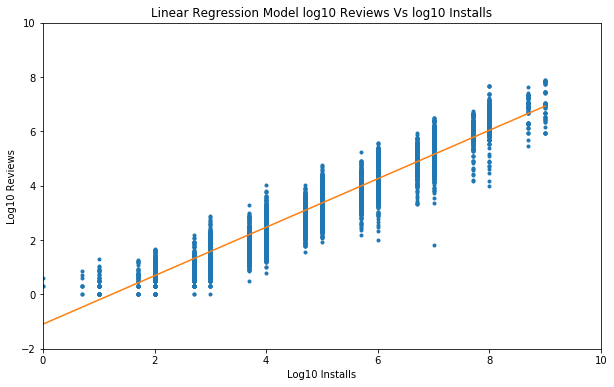

In [21]:
h_x = np.linspace(0, 9, 20) #entre 0 y 9 quiero 20 puntos regularmente espaciados
h_y = [t[1] + t[0]*xx for xx in h_x]


plt.figure(figsize=(10,6))
plt.plot(x_df.log10_installs, y_df, '.')
plt.plot(h_x, h_y, '-')
plt.axis([0,10,-2,10])
plt.xlabel('Log10 Installs')
plt.ylabel('Log10 Reviews')
plt.title('Linear Regression Model log10 Reviews Vs log10 Installs')

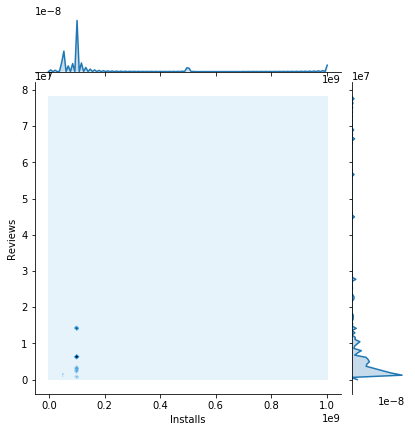

In [53]:

sns.jointplot(apps.Installs,apps.Reviews, kind="kde");

## One-Hot Encoding